<a href="https://colab.research.google.com/github/ajurberg/article-parser/blob/main/02_exploratory_analysis_gdf11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################# 
#@title To prevent Google Colab from disconnecting
#############################
#@markdown https://medium.com/@shivamrawat_756/how-to-prevent-google-colab-from-disconnecting-717b88a128c0

# Ctrl+ Shift + i to open inspector view.
# Then go to console and paste the following code:

# function ClickConnect(){
# console.log("Working"); 
# document.querySelector("colab-toolbar-button").click() 
# }setInterval(ClickConnect,60000)

In [ ]:
############################# 
#@title Installation of libraries 
#############################
import os
import re, string, unicodedata
from string import punctuation
from tqdm import tqdm
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
############################# 
#@title Load datasets 
#############################
df = pd.read_excel("2022-01-03_gdf11.xlsx", index_col=0)
df.head()

title  ...  url
0  [Preliminary study on cerebrospinal fluid prot...  ...  NaN
1  Growth differentiation factor 11 accelerates l...  ...  NaN
2  Detection of GDF11 by using a Ti<sub>3</sub>C<...  ...  NaN
3             Gonadal rejuvenation of mice by GDF11.  ...  NaN
4  Stacked conservation practices reduce nitrogen...  ...  NaN

[5 rows x 9 columns]

In [ ]:
df.shape

(436, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     435 non-null    object
 1   authors   436 non-null    object
 2   journal   436 non-null    object
 3   year      436 non-null    int64 
 4   volume    427 non-null    object
 5   issue     358 non-null    object
 6   abstract  412 non-null    object
 7   doi       428 non-null    object
 8   url       62 non-null     object
dtypes: int64(1), object(8)
memory usage: 34.1+ KB


In [ ]:
############################# 
#@title Missing values
#############################
! pip install missingno

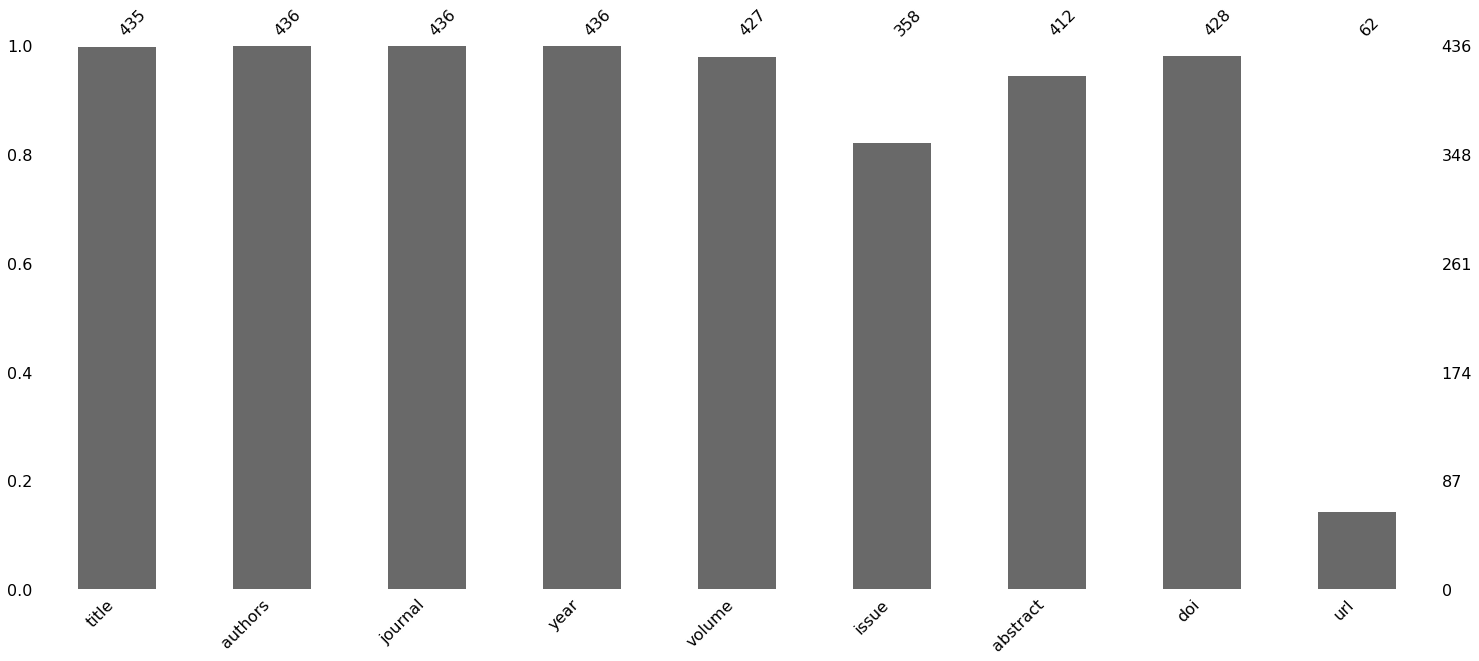

In [ ]:
#@markdown Missing values plot
import missingno as msno

barplot = msno.bar(df);
barplot.figure.savefig('gdf11-msno-barplot.pdf')

In [ ]:
#@markdown Matrix plot for NaN values
matrixplot = msno.matrix(df);

matrixplot.figure.savefig('gdf11-msno-matrixplot.pdf')

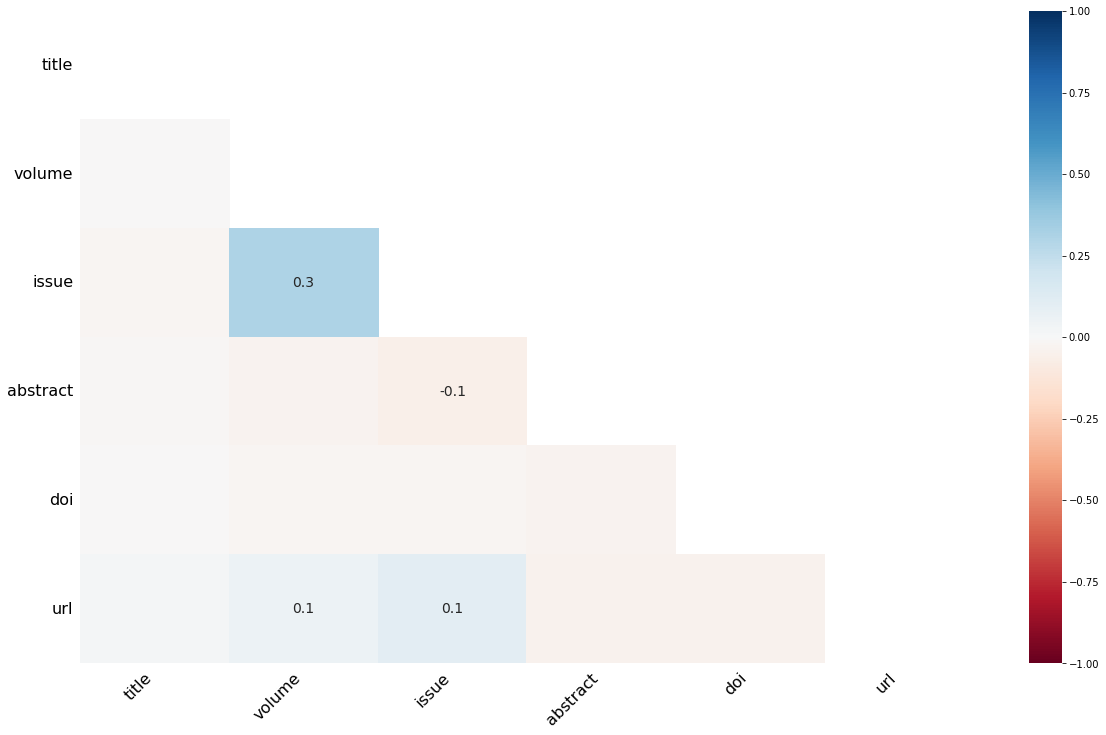

In [ ]:
#@markdown Heatmap for NaN values
heatmap = msno.heatmap(df);

heatmap.figure.savefig('gdf11-msno-heatmap.pdf')

In [ ]:
############################# 
#@title Preprocessing
#############################

In [ ]:
# Since papers must have a title, I fixed this entry
df[df['title'].isna()]

title  ...  url
202   NaN  ...  NaN

[1 rows x 9 columns]

In [ ]:
df.iloc[202,0] = 'Quel pourrait être le futur de la prise en charge de l’anémie dans l’insuffisance rénale chronique?' # Select cell by row and column positions
df[df['title'] == 'Quel pourrait être le futur de la prise en charge de l’anémie dans l’insuffisance rénale chronique?'] # Change paper title (replace nan)

title  ...  url
202  Quel pourrait être le futur de la prise en cha...  ...  NaN

[1 rows x 9 columns]

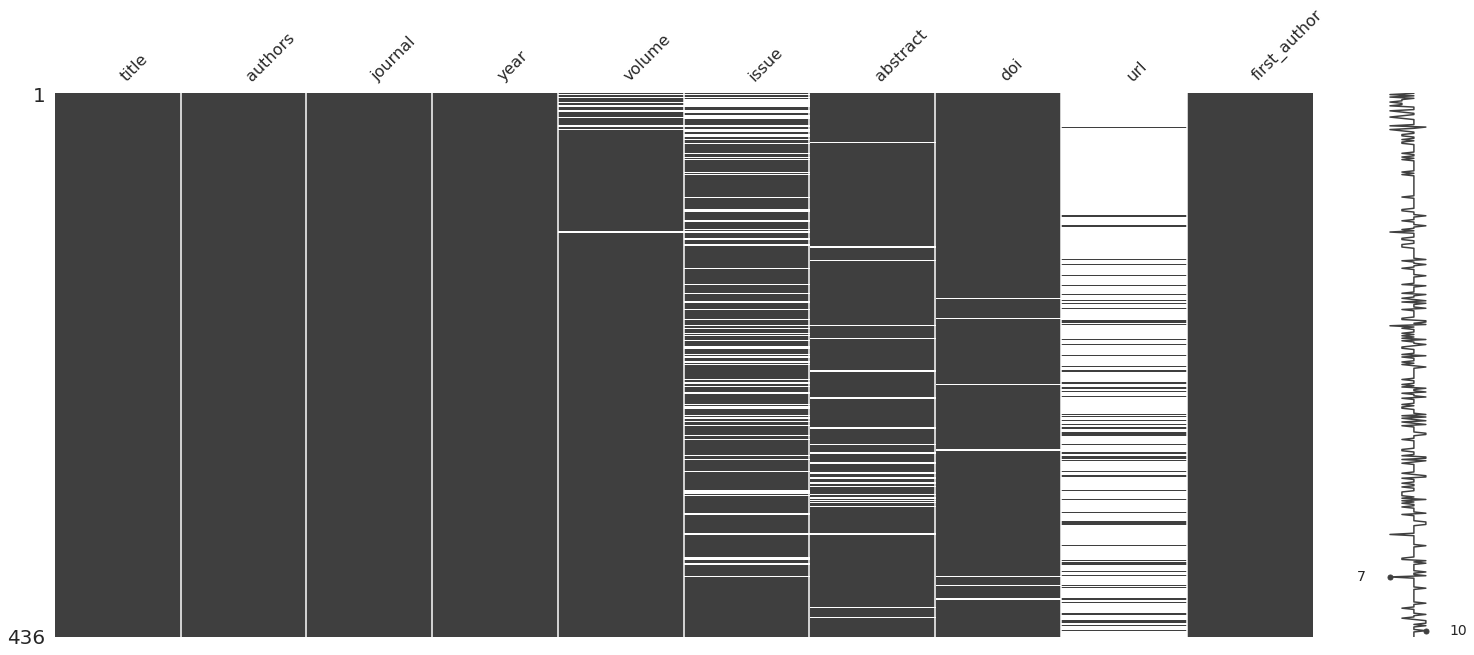

In [ ]:
matrixplotpost = msno.matrix(df)

matrixplotpost.figure.savefig('gdf11-msno-matrix-post.pdf')

In [ ]:
############################# 
#@title Exploratory analysis
#############################

In [ ]:
#@title Papers by year

# To plot data in descending order:
count_by_year = df['year'].value_counts()

# Series to dataframe, then change column name
count_by_year_df = pd.DataFrame(data = count_by_year).reset_index()
count_by_year_df = count_by_year_df.rename(columns={'index':'Publication Year', 'year':'Count'})
count_by_year_df

Publication Year  Count
0               2019     66
1               2020     54
2               2021     52
3               2016     42
4               2018     37
5               2017     36
6               2015     31
7               2014     19
8               2013     13
9               2008     13
10              2010     11
11              2011     10
12              2006      9
13              2009      7
14              2003      6
15              1999      6
16              2005      5
17              2004      5
18              2007      4
19              2012      3
20              2001      3
21              2002      2
22              2000      1
23              2022      1

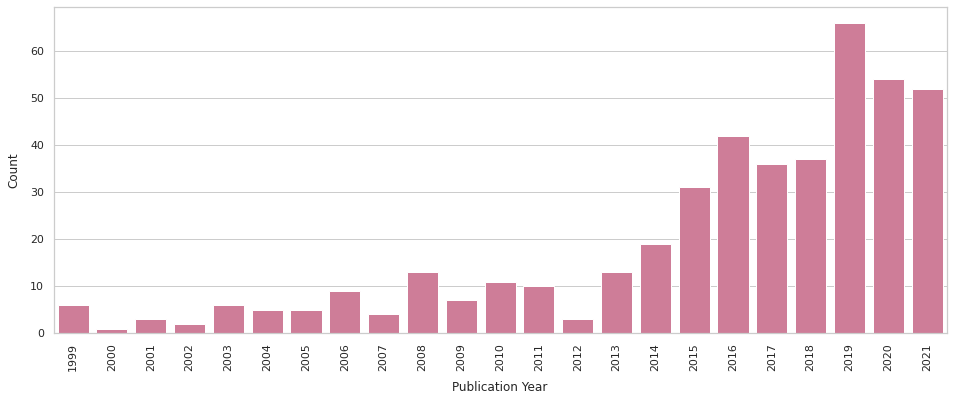

In [ ]:
# PLOT Number of papers by year

# Aesthetics
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 6))

# Plot
sns.set_color_codes('dark')
barplot = sns.barplot(x='Publication Year', y='Count', data=count_by_year_df[count_by_year_df['Publication Year'] <= 2021], 
                      color='palevioletred')

# Add a legend and informative axis labels
ax.set_xlabel('Publication Year', labelpad=10.0)
ax.set_ylabel('Count', labelpad=10.0)
plt.xticks(rotation=90);

barplot.figure.savefig('gdf11-barplot-papers-by-year.pdf')

In [ ]:
#@title Papers by journal

# Number of unique journals in the dataset
print(f"There are {len(df['journal'].unique())} unique journals, such as {', '.join(df['journal'].unique()[0:5])}.")

# Number of papers by Journal
df['journal'].value_counts()

There are 263 unique journals, such as Zhongguo Zhong Yao Za Zhi, Aging Cell, Opt Express, J Gerontol A Biol Sci Med Sci, J Environ Manage.


Dev Biol                            9
Sci Rep                             8
Circ Res                            8
Proc Natl Acad Sci U S A            7
PLoS One                            7
                                   ..
BMB Rep                             1
Birth Defects Res C Embryo Today    1
Cell Res                            1
Cancer Sci                          1
N Engl J Med                        1
Name: journal, Length: 263, dtype: int64

In [ ]:
# To plot data in descending order:
count_by_journal = df['journal'].value_counts()

# Series to dataframe, then change column name
count_by_journal_df = pd.DataFrame(data = count_by_journal).reset_index()
count_by_journal_df = count_by_journal_df.rename(columns={'index':'Journal', 'journal':'Count'})
count_by_journal_df

Journal  Count
0                            Dev Biol      9
1                             Sci Rep      8
2                            Circ Res      8
3            Proc Natl Acad Sci U S A      7
4                            PLoS One      7
..                                ...    ...
258                           BMB Rep      1
259  Birth Defects Res C Embryo Today      1
260                          Cell Res      1
261                        Cancer Sci      1
262                      N Engl J Med      1

[263 rows x 2 columns]

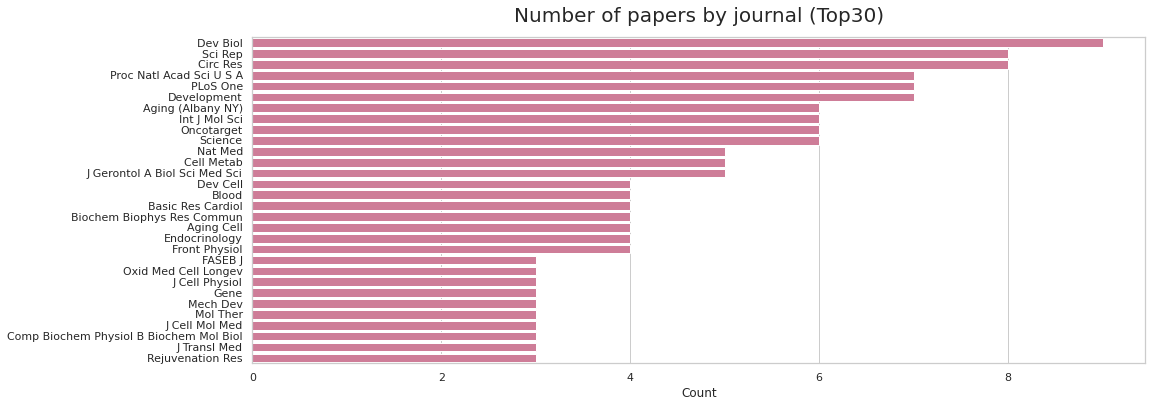

In [ ]:
# PLOT Number of papers by journal (TOP30)

# Aesthetics
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 6))

# Plot
sns.set_color_codes('dark')
journalbarplot = sns.barplot(x='Count', y='Journal', data=count_by_journal_df.head(30),
                      color='palevioletred')

# Add a legend and informative axis labels
plt.xticks(rotation=0)
ax.set_title('Number of papers by journal (Top30)', loc='center',fontsize=20, pad=15.0)
ax.set(ylabel='', xlabel='Count');

journalbarplot.figure.savefig('gdf11-barplot-papers-by-journal.pdf')

In [ ]:
# Group by journal
journals = df.groupby("journal")

# List journals that published most papers on the subject
journals.size().sort_values(ascending=False).head(15)

nb_papers_df = count_by_journal_df.groupby(['Count']).count().reset_index()
nb_papers_df = nb_papers_df.rename(columns={'Count':'Number of papers', 'Journal':'Number of journals'})
nb_papers_df

Number of papers  Number of journals
0                 1                 184
1                 2                  38
2                 3                  21
3                 4                   7
4                 5                   3
5                 6                   4
6                 7                   3
7                 8                   2
8                 9                   1

In [ ]:
# Aggregating the number of journals by the number of papers
nb_papers_df['bins'] = pd.cut(nb_papers_df['Number of papers'], bins=[-1,1,2,3,4,5,6,7,8,9], labels=['1','2','3','4','5','6','7','8','9'])
nb_papers_df.head(15)

Number of papers  Number of journals bins
0                 1                 184    1
1                 2                  38    2
2                 3                  21    3
3                 4                   7    4
4                 5                   3    5
5                 6                   4    6
6                 7                   3    7
7                 8                   2    8
8                 9                   1    9

In [ ]:
# Group papers by the number of published papers
nb_papers_df.groupby('bins')['Number of journals'].sum()

bins
1    184
2     38
3     21
4      7
5      3
6      4
7      3
8      2
9      1
Name: Number of journals, dtype: int64

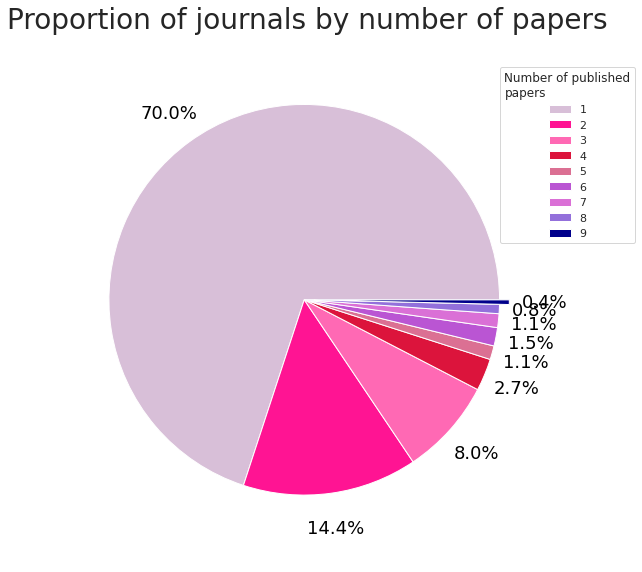

In [ ]:
# Generate a pie plot

# Make figure and assign axis objects
fig1, ax1 = plt.subplots(figsize = (8,8))

# Pie chart parameters
sizes = nb_papers_df.groupby('bins')['Number of journals'].sum()
labels = ['1','2','3','4','5','6','7','8','9']
explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05]
colors = ['thistle', 'deeppink', 'hotpink', 'crimson', 'palevioletred', 'mediumorchid', 'orchid', 'mediumpurple', 'darkblue']

# Rotate so that the first wedge is split by the x-axis
angle = 0 * sizes[1]

ax1.pie(sizes, labels=labels, explode=explode,
        startangle=angle, autopct = '%1.1f%%',
        colors=colors, pctdistance=1.18,
        labeldistance=None,
        textprops=dict(color='black', fontsize=18))

ax1.legend(nb_papers_df.groupby('bins')['Number of journals'].sum().index,
           title = 'Number of published\npapers',
           loc = 'upper right',
           bbox_to_anchor = (0.25, 0.45, 1,0.5)
           )

ax1.axis('equal')
plt.tight_layout()
ax1.set_title('Proportion of journals by number of papers', loc='center',fontsize=28)
plt.show();

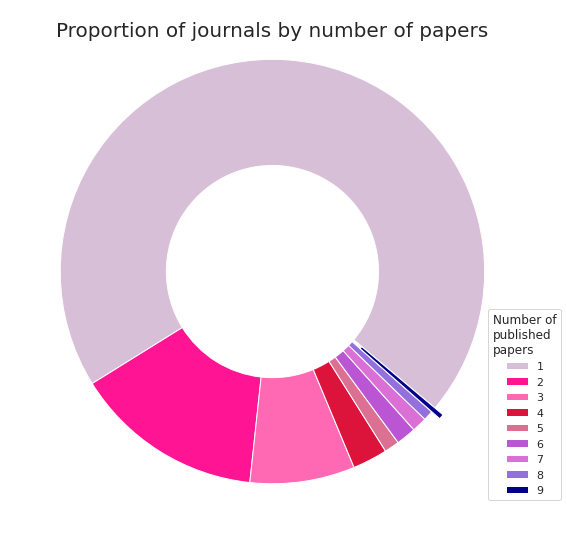

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, explode=explode, colors=colors,
                       wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

pieplot = ax.legend(nb_papers_df.groupby('bins')['Number of journals'].sum().index,
                    title = 'Number of\npublished\npapers',\
                    loc = 'center',
                    bbox_to_anchor = (0.6, -0.5, 0.75,1.5))  

ax.set_title('Proportion of journals by number of papers', loc='center', fontsize=20, pad=-30)

plt.tight_layout()
plt.show()

pieplot.figure.savefig('gdf11-pie-papers-by-journal.pdf')

In [ ]:
#@title Papers by author

#@markdown First author
df['first_author'] = df['authors'].str.split(',').str.get(0).str.replace(r"[","")
df['first_author'] = df['first_author'].str.replace(r"'","")
df['first_author'] = df['first_author'].str.replace(r"]","").str.strip()
df.head()

title  ... last_author
0  [Preliminary study on cerebrospinal fluid prot...  ...       Wu LL
1  Growth differentiation factor 11 accelerates l...  ...       Liu A
2  Detection of GDF11 by using a Ti<sub>3</sub>C<...  ...       Gao Y
3             Gonadal rejuvenation of mice by GDF11.  ...     Zhang S
4  Stacked conservation practices reduce nitrogen...  ...    Soupir M

[5 rows x 11 columns]

In [ ]:
df[df['first_author'] == 'Jurberg AD']

title  ...         last_author
293  A Tale from TGF-β Superfamily for Thymus Ontog...  ...  Cotta-de-Almeida V
343  Switching axial progenitors from producing tru...  ...             Mallo M

[2 rows x 11 columns]

In [ ]:
# Number of unique first authors in the dataset
print(f"There are {len(df['first_author'].unique())} different first authors in this dataset.")
print(f"{round(len(df['first_author'].unique()) / df.shape[0] * 100, 2)}% of the papers were published by different first authors.")

There are 353 different first authors in this dataset.
80.96% of the papers were published by different first authors.


In [ ]:
# To plot data in descending order:
count_by_first_author = df['first_author'].value_counts()

# Series to dataframe, then change column name
first_author_df = pd.DataFrame(data = count_by_first_author).reset_index()
first_author_df = first_author_df.rename(columns={'index':'First Author', 'first_author':'Count'})
first_author_df

First Author  Count
0          Rochette L      5
1              Zhou Y      5
2               Suh J      4
3         Nakashima M      4
4           Walker RG      4
..                ...    ...
348           Yung LM      1
349         Obeidat M      1
350      Khavinson VK      1
351  Auguściak-Duma A      1
352           Pham HG      1

[353 rows x 2 columns]

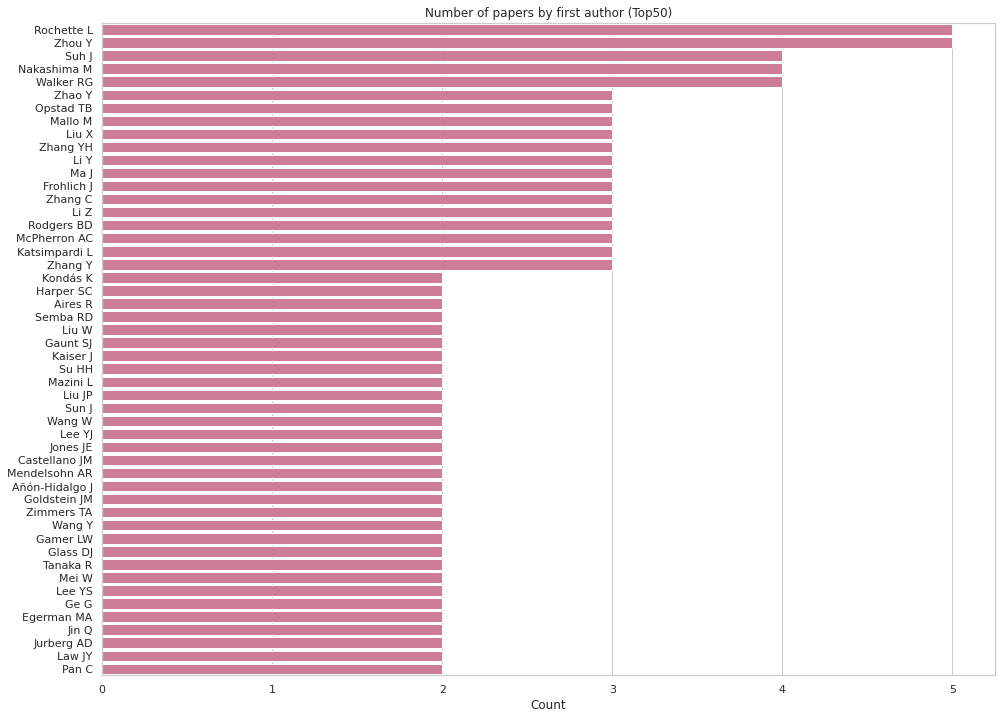

In [ ]:
# PLOT Number of papers by FIRST AUTHOR

# Aesthetics
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Plot
sns.set_color_codes('dark')
firstauthorsplot = sns.barplot(x='Count', y='First Author', data=first_author_df.head(50),
                               color='palevioletred')

# Add a legend and informative axis labels
plt.title('Number of papers by first author (Top50)')
ax.set_xlabel('Count')
plt.xticks(np.arange(0, 6, 1))
ax.set_ylabel('')
plt.xticks(rotation=0)
plt.show();

firstauthorsplot.figure.savefig('gdf11-first-authors.pdf')

In [ ]:
#@markdown Last author
df['last_author'] = df['authors'].str.split(',').str.get(-1).str.replace(r"[","")
df['last_author'] = df['last_author'].str.replace(r"'","")
df['last_author'] = df['last_author'].str.replace(r"]","").str.strip()
df.head()

title  ... last_author
0  [Preliminary study on cerebrospinal fluid prot...  ...       Wu LL
1  Growth differentiation factor 11 accelerates l...  ...       Liu A
2  Detection of GDF11 by using a Ti<sub>3</sub>C<...  ...       Gao Y
3             Gonadal rejuvenation of mice by GDF11.  ...     Zhang S
4  Stacked conservation practices reduce nitrogen...  ...    Soupir M

[5 rows x 11 columns]

In [ ]:
df[df['last_author'] == 'Mallo M']

title  ... last_author
118  The vertebrate tail: a gene playground for evo...  ...     Mallo M
161  Tail Bud Progenitor Activity Relies on a Netwo...  ...     Mallo M
208  Reassessing the Role of Hox Genes during Verte...  ...     Mallo M
257  Oct4 Is a Key Regulator of Vertebrate Trunk Le...  ...     Mallo M
343  Switching axial progenitors from producing tru...  ...     Mallo M

[5 rows x 11 columns]

In [ ]:
# Number of unique last authors in the dataset
print(f"There are {len(df['last_author'].unique())} different last authors in this dataset.")
print(f"{round(len(df['last_author'].unique()) / df.shape[0] * 100, 2)}% of the papers were published by different last authors.")

There are 333 different last authors in this dataset.
76.38% of the papers were published by different last authors.


In [ ]:
# To plot data in descending order:
count_by_last_author = df['last_author'].value_counts()

# Series to dataframe, then change column name
last_author_df = pd.DataFrame(data=count_by_last_author).reset_index()
last_author_df = last_author_df.rename(columns={'index':'Last Author', 'last_author':'Count'})
last_author_df

Last Author  Count
0         Glass DJ      8
1           Lee RT      6
2         Calof AL      6
3           Lee SJ      6
4          Mallo M      5
..             ...    ...
328   Wolvetang EJ      1
329      Chauhan A      1
330  Verfaillie CM      1
331          Gan X      1
332      Donovan A      1

[333 rows x 2 columns]

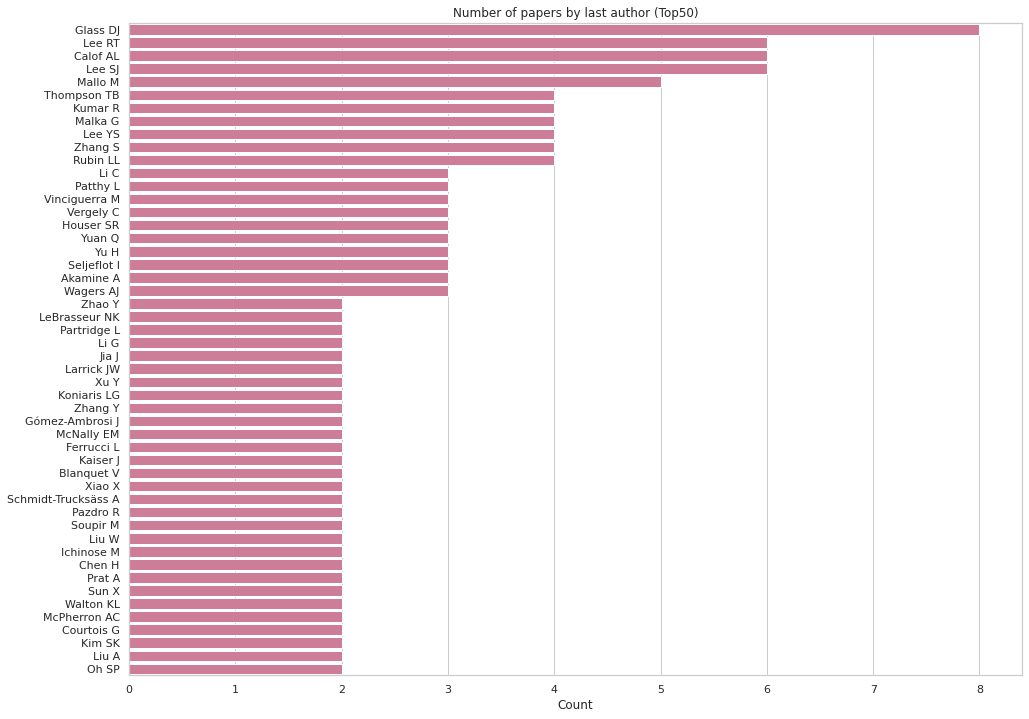

In [ ]:
# PLOT Number of papers by LAST AUTHOR

# Aesthetics
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Plot
sns.set_color_codes('dark')
lastauthorsplot = sns.barplot(x='Count', y='Last Author', data=last_author_df.head(50),
                               color='palevioletred')

# Add a legend and informative axis labels
plt.title('Number of papers by last author (Top50)')
ax.set_xlabel('Count')
plt.xticks(np.arange(0, 9, 1))
ax.set_ylabel('')
plt.xticks(rotation=0)
plt.show();

lastauthorsplot.figure.savefig('gdf11-last-authors.pdf')

In [ ]:
#@markdown Authors by papers (regardless of position)

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split(','):
            words.append(j.strip())
    return words

In [ ]:
corpus = get_corpus(df.authors)
corpus[:10]

["['Li HZ'",
 "'Zeng NX'",
 "'Liu KG'",
 "'Luo WL'",
 "'Lu WJ'",
 "'Wu LL']",
 "['Sun J'",
 "'Li Y'",
 "'Yang X'",
 "'Dong W'"]

In [ ]:
# Clean list
authors = []

for author in corpus:
  author = author.strip().replace("[", "").replace("]", "").replace("'", "")
  authors.append(author)

print(authors)
print(len(authors))

['Li HZ', 'Zeng NX', 'Liu KG', 'Luo WL', 'Lu WJ', 'Wu LL', 'Sun J', 'Li Y', 'Yang X', 'Dong W', 'Yang J', 'Hu Q', 'Zhang C', 'Fang H', 'Liu A', 'Liu C', 'Wang R', 'Shao Y', 'Chen C', 'Wu P', 'Wei Y', 'Gao Y', 'Zhou Y', 'Ni S', 'Li C', 'Song L', 'Zhang S', 'Law JY', 'Long LA', 'Kaleita A', 'Helmers M', 'Brendel C', 'van der Woude K', 'Soupir M', 'Xu Y', 'Hu X', 'Li F', 'Zhang H', 'Lou J', 'Wang X', 'Wang H', 'Yin L', 'Ni W', 'Kong J', 'Wang X', 'Li Y', 'Zhou K', 'Xu H', 'Chen D', 'Huang H', 'Zang L', 'Gao W', 'Zhu H', 'Yu X', 'Masuzawa R', 'Takahashi K', 'Takano K', 'Nishino I', 'Sakai T', 'Endo T', 'Su HH', 'Yen JC', 'Liao JM', 'Wang YH', 'Liu PH', 'MacDonald IJ', 'Tsai CF', 'Chen YH', 'Huang SS', 'Wang DX', 'Zhu XD', 'Ma XR', 'Wang LB', 'Dong ZJ', 'Lin RR', 'Cao YN', 'Zhao JW', 'Rodgers BD', 'Ward CW', 'Starcher AE', 'Peissig K', 'Stanton JB', 'Churchill GA', 'Cai D', 'Maxwell JT', 'Grider A', 'Love K', 'Chen SY', 'Coleman AE', 'Strauss E', 'Pazdro R', 'Mayweather BA', 'Buchanan SM', 

In [ ]:
# List to datafratme
authors_df = pd.DataFrame([x.split(',') for x in authors])
authors_df = authors_df.rename(columns={0:'Author'})
authors_df

Author
0           Li HZ
1         Zeng NX
2          Liu KG
3          Luo WL
4           Lu WJ
...           ...
3280      Rosen V
3281  Nakashima M
3282     Toyono T
3283    Akamine A
3284     Joyner A

[3285 rows x 1 columns]

In [ ]:
# AUTHORS: To plot data in descending order:
count_by_author = authors_df.value_counts()

# Series to dataframe, then change column name
count_by_author_df = pd.DataFrame(data = count_by_author).reset_index()
count_by_author_df = count_by_author_df.rename(columns={0:'Count'})
count_by_author_df

Author  Count
0          Zhang Y     16
1           Wang X     13
2           Wang Y     13
3           Lee RT     12
4           Lee SJ     11
...            ...    ...
2355         Ott M      1
2356      Ouyang Z      1
2357       Owens J      1
2358     Oxburgh L      1
2359  "DAlessio S"      1

[2360 rows x 2 columns]

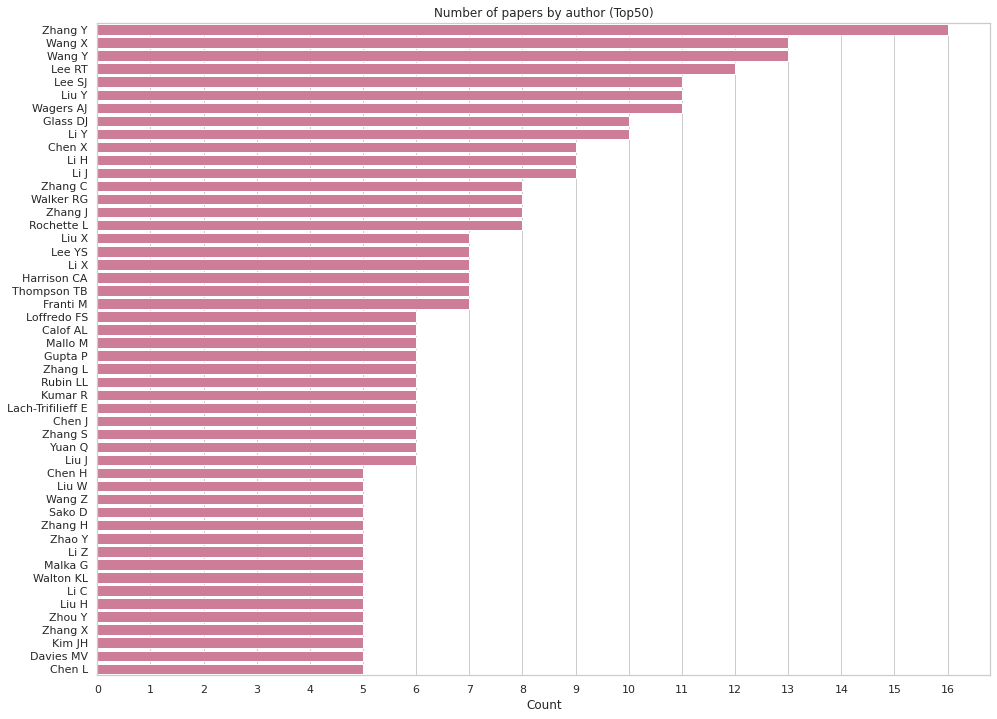

In [ ]:
# PLOT Number of papers by LAST AUTHOR

# Aesthetics
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Plot
sns.set_color_codes('dark')
authorsplot = sns.barplot(x='Count', y='Author', data=count_by_author_df.head(50),
                               color='palevioletred')

# Add a legend and informative axis labels
plt.title('Number of papers by author (Top50)')
ax.set_xlabel('Count')
plt.xticks(np.arange(0, 17, 1))
ax.set_ylabel('')
plt.xticks(rotation=0)
plt.show();

authorsplot.figure.savefig('gdf11-authors.pdf')

In [ ]:
#@title Wordcloud

#@markdown Preprocessing

def cleaning_text(string):
  # Lower case
  string = string.lower()

  # Replace '\n' with ' '
  string = string.strip().replace('\n', '')

  # Replace '\t' with ' '
  string = string.strip().replace('\t', '')

  # Replace 'fig.' with 'fig_'
  string = string.strip().replace('fig.', 'fig_')

  # Remove '- '
  string = string.strip().replace('- ', '')

  # Replace 'et al.' with 'et_al'
  string = string.strip().replace('et al.', 'et_al')
  
  # Replace '<sub>' with ''
  string = string.strip().replace('<sub>', '').replace('</sub>', '')

  # Replace 'growth differentiation factor 11' with 'growth_differentiation_factor_11'
  string = string.strip().replace('growth differentiation factor 11', 'growth_differentiation_factor_11')

  # Replace 'growth/differentiation factor 11' with 'growth_differentiation_factor_11'
  string = string.strip().replace('growth/differentiation factor 11', 'growth_differentiation_factor_11')

  return string

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from string import punctuation

# Stopwords from stopwords-json
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)

# Combine the stopwords
stop = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Add new stopwords - just include new stopwords in the list as needed
new_stops = [
             "et_al", "page", "fig_", "fig", "suggest","wether", "may","letter",
             "within","anuscript", "thus", "ih", "med", "uthor", "ama",
             "author", "whether", "manuscript", "transl", "also"
             ]

for n in new_stops:
  stop.add(n)

In [ ]:
# Denoise
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_dot(text):
    return re.sub(r'\.(?!\d)', '', text)

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Removing stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    text = remove_dot(text)
    return text

In [ ]:
#@markdown Stanza lemmatization

#@markdown **Citing Stanza in papers:**
#@markdown - Peng Qi, Yuhao Zhang, Yuhui Zhang, Jason Bolton and Christopher D. Manning. 2020. Stanza: A Python Natural Language Processing Toolkit for Many Human Languages. In Association for Computational Linguistics (ACL) System Demonstrations. 2020.

#@markdown **Biomedical and clinical model packages**
#@markdown - Yuhao Zhang, Yuhui Zhang, Peng Qi, Christopher D. Manning, Curtis P. Langlotz. (2020). Biomedical and Clinical English Model Packages in the Stanza Python NLP Library. arXiv preprint arXiv:2004.14530.

! pip install stanza

     |████████████████████████████████| 432 kB 4.2 MB/s 
     |████████████████████████████████| 170 kB 45.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=57032610d598f04a60d1939295d122bcf88ed0ac5ce54aedbc5f43179575bb22
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import stanza

# download and initialize the CRAFT pipeline [Biomedical and Clinical Model]
stanza.download('en', package='craft', processors='tokenize,mwt,pos,lemma')
nlp = stanza.Pipeline('en', package='craft', processors='tokenize,mwt,pos,lemma', use_gpu=True) # pos_batch_size=1000

2022-01-05 16:24:44 WARNING: Can not find mwt: craft from official model list. Ignoring it.
2022-01-05 16:24:44 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| pretrain  | craft   |



2022-01-05 16:24:59 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-01-05 16:24:59 WARNING: Can not find mwt: craft from official model list. Ignoring it.
2022-01-05 16:24:59 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |

2022-01-05 16:24:59 INFO: Use device: cpu
2022-01-05 16:24:59 INFO: Loading: tokenize
2022-01-05 16:24:59 INFO: Loading: pos
2022-01-05 16:25:00 INFO: Loading: lemma
2022-01-05 16:25:00 INFO: Done loading processors!


In [ ]:
#@title Wordcloud from Titles

# To generate a list of strings
title_string = []

for title in df.title:
  for words in title.split():
    title_string.append(words)

title_text = pd.Series(title_string).str.cat(sep=' ')

In [ ]:
title_text = cleaning_text(title_text).replace("[","").replace("]","")
title_text

'preliminary study on cerebrospinal fluid proteomics of erxian decoction against neurogenesis impairment in late-onset depression. growth_differentiation_factor_11 accelerates liver senescence through the inhibition of autophagy. detection of gdf11 by using a ti3c2-mxene-based fiber spr biosensor. gonadal rejuvenation of mice by gdf11. stacked conservation practices reduce nitrogen loss: a paired watershed study. gdf-11 protects the traumatically injured spinal cord by suppressing pyroptosis and necroptosis via tfe3-mediated autophagy augmentation. development and verification of the hypoxiaand immune-associated prognostic signature for pancreatic ductal adenocarcinoma. da-raf and the mek inhibitor trametinib reverse skeletal myocyte differentiation inhibition or muscle atrophy caused by myostatin and gdf11 through the non-smad ras-erk pathway. in situ slow-release recombinant growth_differentiation_factor_11 exhibits therapeutic efficacy in ischemic stroke. loss of growth_differentiat

In [ ]:
# run Stanza annotation
doc = nlp(title_text)

# Store text, lemma and POS tag of each word
stanza_text = []
stanza_lemma = []
stanza_pos = []

for sentence in tqdm(doc.sentences):
  for word in sentence.words:
    stanza_text.append(word.text)
    stanza_lemma.append(word.lemma)
    stanza_pos.append(word.pos)

# For verification
# Create and print stanza_df1
_ = {'text': stanza_text, 'lemma': stanza_lemma, 'pos': stanza_pos}
stanza_title_df = pd.DataFrame(data=_)
stanza_title_df.shape

# Save to excel
stanza_title_df.to_excel("gdf11-titles-stanza.xlsx")

# Download file
from google.colab import files
files.download("gdf11-titles-stanza.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Clean and denoise lemmatized text
lemma_temp = []

for lemma in stanza_lemma:
  lemma = re.sub('[%s]' % re.escape(string.punctuation), ' ', lemma) # Replace punctuations with a white space
  lemma_temp.append(denoise_text(cleaning_text(lemma))) # runs cleaning_text() then denoise_text()

print(lemma_temp)

100%|██████████| 6452/6452 [00:00<00:00, 14738.44it/s]

['preliminary', 'study', '', 'cerebrospinal', 'fluid', 'proteomic', '', 'erxian', 'decoction', '', 'neurogenesis', 'impairment', '', 'late onset', 'depression', '', 'growth_differentiation_factor_11', 'accelerate', 'liver', 'senescence', '', '', 'inhibition', '', 'autophagy', '', 'detection', '', 'gdf11', '', '', '', 'ti3c2', '', 'mxene base', 'fiber', 'spr', 'biosensor', '', 'gonadal', 'rejuvenation', '', 'mouse', '', 'gdf11', 'stack', 'conservation', 'practice', 'reduce', 'nitrogen', 'loss', '', '', 'pair', 'watersh', 'study', '', 'gdf 11', 'protect', '', 'traumatically', 'injure', 'spinal', 'cord', '', 'suppress', 'pyroptosis', '', 'necroptosis', '', 'tfe3', '', 'mediate', 'autophagy', 'augmentation', '', 'development', '', 'verification', '', '', 'hypoxiaand', 'immune associate', 'prognostic', 'signature', '', 'pancreatic', 'ductal', 'adenocarcinoma', '', 'da raf', '', '', 'mek', 'inhibitor', 'trametinib', 'reverse', 'skeletal', 'myocyte', 'differentiation', 'inhibition', '', 'musc

In [ ]:
# To remove words that are less than 2 letters in length
lemma_words = []

for word in lemma_temp:
  if not len(word) < 2:
    lemma_words.append(word)

print(lemma_words)

['preliminary', 'study', 'cerebrospinal', 'fluid', 'proteomic', 'erxian', 'decoction', 'neurogenesis', 'impairment', 'late onset', 'depression', 'growth_differentiation_factor_11', 'accelerate', 'liver', 'senescence', 'inhibition', 'autophagy', 'detection', 'gdf11', 'ti3c2', 'mxene base', 'fiber', 'spr', 'biosensor', 'gonadal', 'rejuvenation', 'mouse', 'gdf11', 'stack', 'conservation', 'practice', 'reduce', 'nitrogen', 'loss', 'pair', 'watersh', 'study', 'gdf 11', 'protect', 'traumatically', 'injure', 'spinal', 'cord', 'suppress', 'pyroptosis', 'necroptosis', 'tfe3', 'mediate', 'autophagy', 'augmentation', 'development', 'verification', 'hypoxiaand', 'immune associate', 'prognostic', 'signature', 'pancreatic', 'ductal', 'adenocarcinoma', 'da raf', 'mek', 'inhibitor', 'trametinib', 'reverse', 'skeletal', 'myocyte', 'differentiation', 'inhibition', 'muscle', 'atrophy', 'myostatin', 'gdf11', 'smad', 'ras erk', 'pathway', 'situ', 'slow release', 'recombinant', 'growth_differentiation_facto

In [ ]:
# Additional cleaning: convert into string and replace " ' " by "" and "," by ""
lemma_string = str(lemma_words).strip().replace("'", "").replace(",", "").replace("[", "")
lemma_string

'preliminary study cerebrospinal fluid proteomic erxian decoction neurogenesis impairment late onset depression growth_differentiation_factor_11 accelerate liver senescence inhibition autophagy detection gdf11 ti3c2 mxene base fiber spr biosensor gonadal rejuvenation mouse gdf11 stack conservation practice reduce nitrogen loss pair watersh study gdf 11 protect traumatically injure spinal cord suppress pyroptosis necroptosis tfe3 mediate autophagy augmentation development verification hypoxiaand immune associate prognostic signature pancreatic ductal adenocarcinoma da raf mek inhibitor trametinib reverse skeletal myocyte differentiation inhibition muscle atrophy myostatin gdf11 smad ras erk pathway situ slow release recombinant growth_differentiation_factor_11 exhibit therapeutic efficacy ischemic stroke loss growth_differentiation_factor_11 shorten telomere length downregulate telomerase activity myostatin activin receptor ligand muscle development status attenuate drug system approach

In [ ]:
# Total number of words
print(f"There are {len(lemma_string)} words in the combination of all titles.")

There are 36901 words in the combination of all titles.


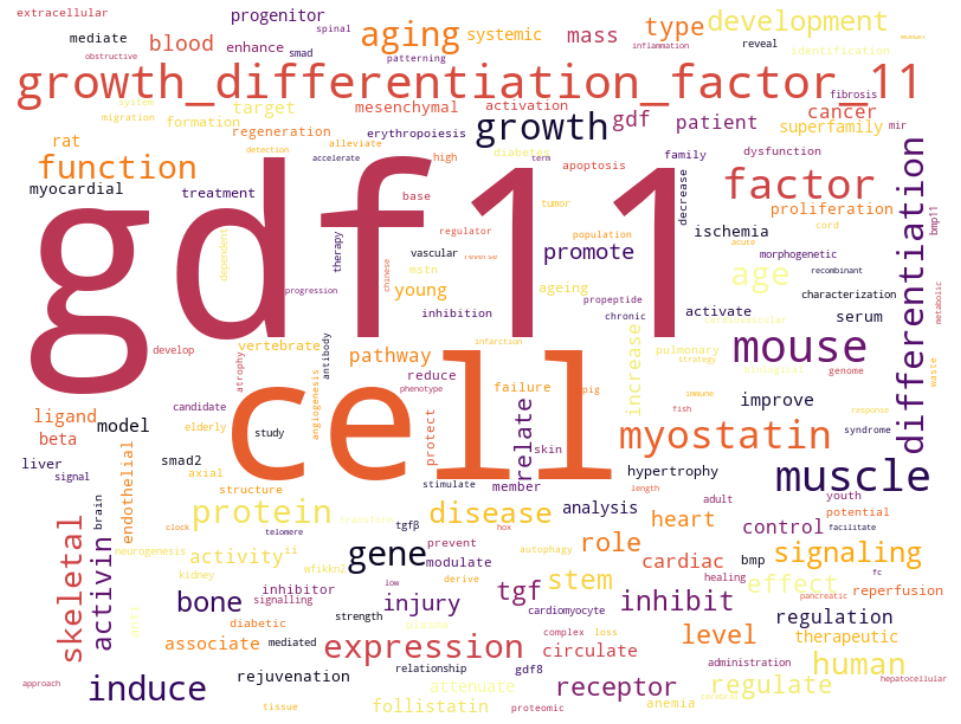

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from wordcloud import WordCloud

outpath = "/content/"

# Create word cloud image
wc = WordCloud(width=800, height=600,
               background_color="white",
               max_font_size=200,
               stopwords=stop,
               colormap='inferno',
               collocations=False)

titlecloud = wc.generate(lemma_string) # CHANGE HERE TO GENERATE WORDCLOUD
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=.5, w_pad=.5, h_pad=.5);
plt.show()

titlecloud.to_file("gdf11-wordcloud-titles.pdf")

files.download("gdf11-wordcloud-titles.pdf")

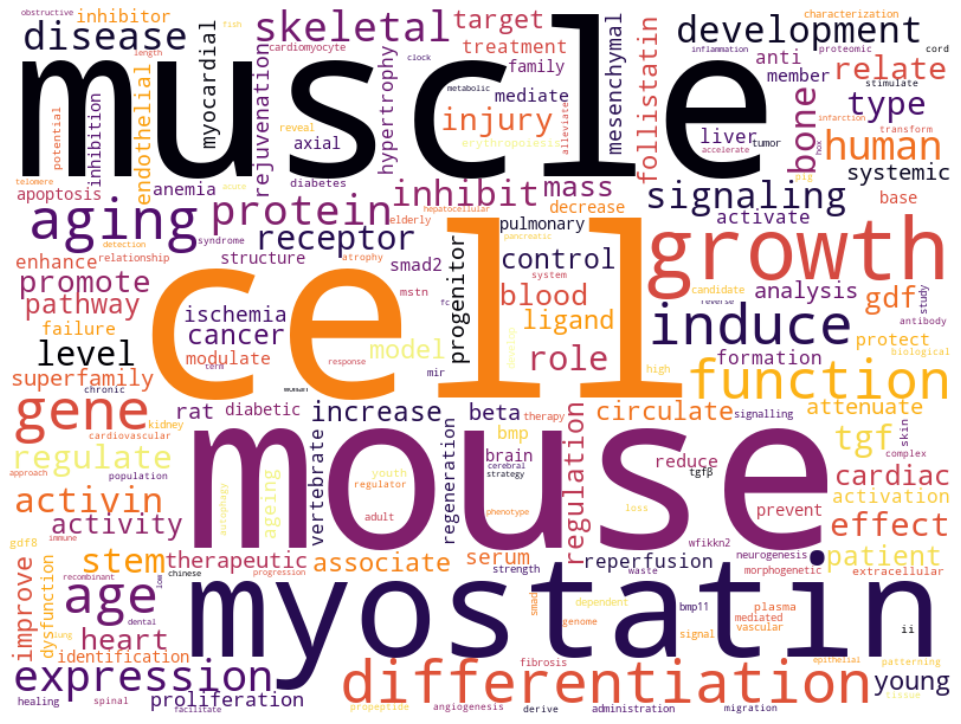

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Additional cleaning: removal of 'gdf11' and similar terms
lemma_string_noGdf11 = str(lemma_words).strip().replace("gdf11", "").replace("growth_differentiation_factor_11", "").replace("factor", "").replace("'", "")


from wordcloud import WordCloud

outpath = "/content/"

# Create word cloud image
wc = WordCloud(width=800, height=600,
               background_color="white",
               max_font_size=200,
               stopwords=stop,
               colormap='inferno',
               collocations=False)

titlecloud = wc.generate(lemma_string_noGdf11) # CHANGE HERE TO GENERATE WORDCLOUD
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=.5, w_pad=.5, h_pad=.5);
plt.show()

titlecloud.to_file("gdf11-wordcloud-titles-noGdf11.pdf")

files.download("gdf11-wordcloud-titles-noGdf11.pdf")

In [ ]:
#@title Wordcloud from Abstracts
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# To evaluate missing values
msno.matrix(df);

In [ ]:
# To join all abstracts into a single string
abstract_string = ""

for abstract in df['abstract'].dropna():
  abstract_string += abstract

abstract_string

'This study aims to elucidate the underlying mechanism of Erxian Decoction(EXD) against neurogenesis impairment in late-onset depression(LOD) rats based on cerebrospinal fluid(CSF) proteomics. A total of 66 20-21-month-old male Wistar rats were randomized into naturally aged(AGED) group, LOD group, and EXD group. All rats received chronic unpredictable mild stress(CUMS) for 6 weeks for LOD modeling except for the AGED group. During the modeling, EXD group was given EXD(ig, twice a day at 4 g·kg~(-1)) and other groups received equivalent amount of normal saline(ig). After modeling, a series of behavioral tests, such as sucrose preference test(SPT), open-field test(OFT), forced swimming test(FST), and Morris water maze test(MWMT) were performed. Immunofluorescence method was used to detect the number of Ki-67/Nesti-positive cells and BrdU/DCX-positive cells in the hippocampal DG area of each group. High-concentration corticosterone(CORT) was combined with D-galactose(D-gal) to simulate t

In [ ]:
# run Stanza annotation
doc = nlp(abstract_string) #abstract_text

# Store text, lemma and POS tag of each word
stanza_text = []
stanza_lemma = []
stanza_pos = []

for sentence in tqdm(doc.sentences):
  for word in sentence.words:
    stanza_text.append(word.text)
    stanza_lemma.append(word.lemma)
    stanza_pos.append(word.pos)

# For verification
# Create and print stanza_df1
_ = {'text': stanza_text, 'lemma': stanza_lemma, 'pos': stanza_pos}
stanza_abstract_df = pd.DataFrame(data=_)
stanza_abstract_df.shape

100%|██████████| 3411/3411 [00:00<00:00, 34839.67it/s]


(92242, 3)

In [ ]:
# Save to excel
stanza_abstract_df.to_excel("gdf11-abstracts-stanza.xlsx")

# Download file
from google.colab import files
files.download("gdf11-abstracts-stanza.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Clean and denoise lemmatized text
lemma_temp = []

for lemma in stanza_lemma:
  lemma = re.sub('[%s]' % re.escape(string.punctuation), ' ', lemma) # Replace punctuations with a white space
  lemma_temp.append(denoise_text(cleaning_text(lemma))) # runs cleaning_text() then denoise_text()

print(lemma_temp)

['', 'study', 'aim', '', 'elucidate', '', 'underlie', 'mechanism', '', 'erxian', 'decoction', '', 'exd', '', '', 'neurogenesis', 'impairment', '', 'late', 'onset', 'depression', '', 'lod', '', 'rat', 'base', '', 'cerebrospinal', 'fluid', '', 'csf', '', 'proteomic', '', '', 'total', '', '66', '20', '', '21', '', 'month', '', 'male', 'wistar', 'rat', '', 'randomize', '', 'naturally', 'age', '', 'aged', '', 'group', '', 'lod', 'group', '', '', 'exd', 'group', '', '', 'rat', 'receive', 'chronic', 'unpredictable', 'mild', 'stress', '', 'cums', '', '', '6', 'week', '', 'lod', 'modeling', '', '', '', 'aged', 'group', '', '', '', 'modeling', '', 'exd', 'group', '', 'give', 'exd', '', 'ig', '', '', '', 'day', '', '4', 'g·kg', '', '', '', '1', '', '', '', '', 'group', 'receive', 'equivalent', 'amount', '', 'normal', 'saline', '', 'ig', '', '', '', 'modeling', '', '', 'series', '', 'behavioral', 'test', '', '', '', 'sucrose', 'preference', 'test', '', 'spt', '', '', 'open field', 'test', '', 'oft

In [ ]:
# To remove words that are less than 2 letters in length
lemma_words = []

for word in lemma_temp:
  if not len(word) < 2:
    lemma_words.append(word)

print(lemma_words)

['study', 'aim', 'elucidate', 'underlie', 'mechanism', 'erxian', 'decoction', 'exd', 'neurogenesis', 'impairment', 'late', 'onset', 'depression', 'lod', 'rat', 'base', 'cerebrospinal', 'fluid', 'csf', 'proteomic', 'total', '66', '20', '21', 'month', 'male', 'wistar', 'rat', 'randomize', 'naturally', 'age', 'aged', 'group', 'lod', 'group', 'exd', 'group', 'rat', 'receive', 'chronic', 'unpredictable', 'mild', 'stress', 'cums', 'week', 'lod', 'modeling', 'aged', 'group', 'modeling', 'exd', 'group', 'give', 'exd', 'ig', 'day', 'g·kg', 'group', 'receive', 'equivalent', 'amount', 'normal', 'saline', 'ig', 'modeling', 'series', 'behavioral', 'test', 'sucrose', 'preference', 'test', 'spt', 'open field', 'test', 'oft', 'force', 'swimming', 'test', 'fst', 'morris', 'water', 'maze', 'test', 'mwmt', 'perform', 'immunofluorescence', 'method', 'detect', 'number', 'ki 67', 'nesti positive', 'cell', 'brdu', 'dcx positive', 'cell', 'hippocampal', 'dg', 'area', 'group', 'high concentration', 'corticoste

In [ ]:
# Additional cleaning: convert into string and replace " ' " by "" and "," by ""
lemma_string = str(lemma_words).strip().replace("'", "").replace(",", "").replace("[", "")
lemma_string

'study aim elucidate underlie mechanism erxian decoction exd neurogenesis impairment late onset depression lod rat base cerebrospinal fluid csf proteomic total 66 20 21 month male wistar rat randomize naturally age aged group lod group exd group rat receive chronic unpredictable mild stress cums week lod modeling aged group modeling exd group give exd ig day g·kg group receive equivalent amount normal saline ig modeling series behavioral test sucrose preference test spt open field test oft force swimming test fst morris water maze test mwmt perform immunofluorescence method detect number ki 67 nesti positive cell brdu dcx positive cell hippocampal dg area group high concentration corticosterone cort combine galactose gal simulate change lod relate stress aging proliferation differentiation primary neural stem cell hippocampus group observe datum independent acquisition dia mass spectrometry ms analyze differential proteins csf group bioinformatics analysis perform explore biological fu

In [ ]:
# Total number of words
print(f"There are {len(lemma_string)} words in the combination of all abstracts.")

There are 385199 words in the combination of all abstracts.


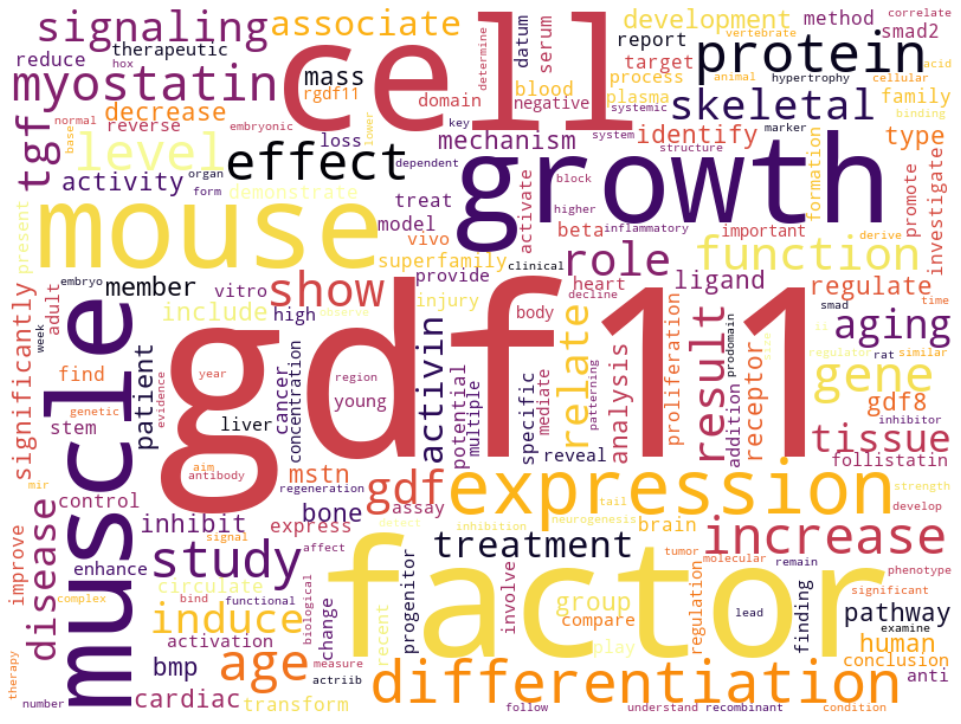

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from wordcloud import WordCloud

outpath = "/content/"

# Create word cloud image
wc = WordCloud(width=800, height=600,
               background_color="white",
               max_font_size=200,
               stopwords=stop,
               colormap='inferno',
               collocations=False)

abstractcloud = wc.generate(lemma_string) # CHANGE HERE TO GENERATE WORDCLOUD
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=.5, w_pad=.5, h_pad=.5);
plt.show()

abstractcloud.to_file("gdf11-wordcloud-abstracts.pdf")

files.download("gdf11-wordcloud-abstracts.pdf")

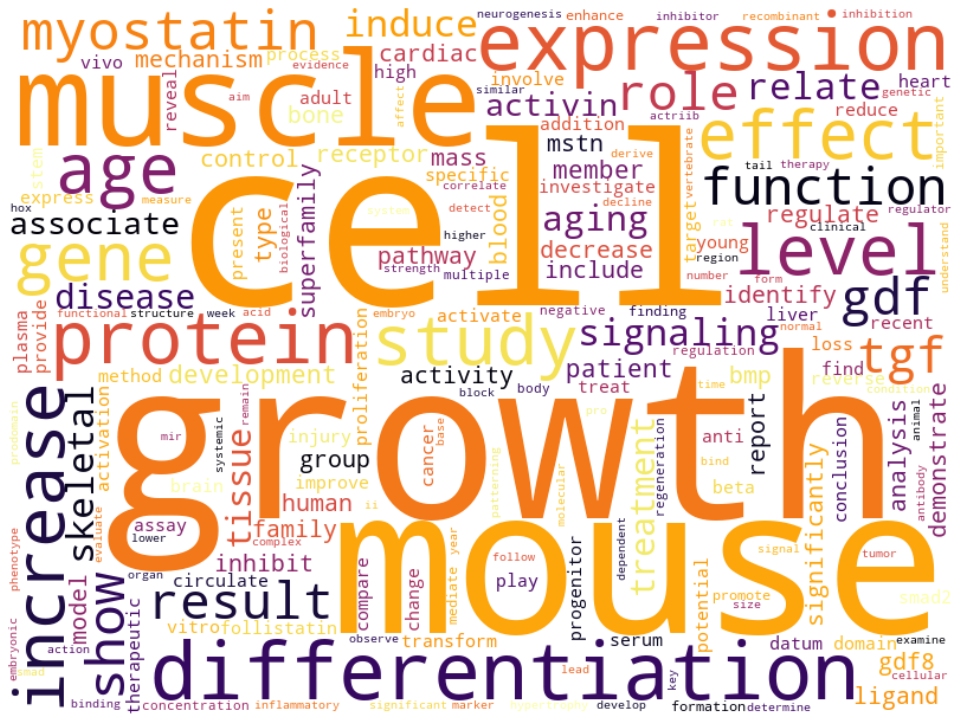

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Additional cleaning: removal of 'gdf11' and similar terms
lemma_string_noGdf11 = str(lemma_words).strip().replace("gdf11", "").replace("growth_differentiation_factor_11", "").replace("factor", "").replace("'", "")


from wordcloud import WordCloud

outpath = "/content/"

# Create word cloud image
wc = WordCloud(width=800, height=600,
               background_color="white",
               max_font_size=200,
               stopwords=stop,
               colormap='inferno',
               collocations=False)

titlecloud = wc.generate(lemma_string_noGdf11) # CHANGE HERE TO GENERATE WORDCLOUD
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=.5, w_pad=.5, h_pad=.5);
plt.show()

titlecloud.to_file("gdf11-wordcloud-abstracts-noGdf11.pdf")

files.download("gdf11-wordcloud-abstracts-noGdf11.pdf")